In [1]:
import gzip
import os
import pickle
from tqdm import tqdm
from Utilities import *

import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams.update({"pdf.fonttype": 42, 'text.usetex': True})

In [3]:
seed_list = [0, 1, 2, 3, 4, 5]

# SHL with ReLU activation in 1d

### Varying width

In [4]:
width_list = [32, 128, 512, 1024]
color_dict = {32: 'blue', 128: 'green', 512: 'orange', 1024: 'red'}

In [9]:
dict = {}
dict_unbiased = {}

for seed in tqdm(seed_list):
    for width in width_list:
        path = f'VarPro_ReLU_1d/results/width{width:.0f}_lmbda-3.0_gamma100.0_N4096_ts-10.0_seed{seed:.0f}.pkl.gz'
        with gzip.open(path, 'rb') as f:
            dict[(seed, width)] = pickle.load(f)
        path_unbiased = f'VarPro_ReLU_1d_unbiased/results/width{width:.0f}_lmbda-3.0_gamma100.0_N4096_ts-10.0_seed{seed:.0f}.pkl.gz'
        with gzip.open(path_unbiased, 'rb') as f:
            dict_unbiased[(seed, width)] = pickle.load(f)

100%|██████████| 6/6 [02:58<00:00, 29.73s/it]


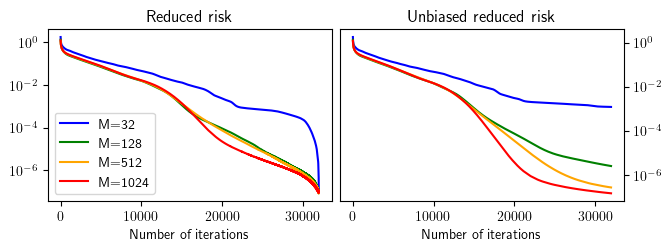

In [31]:
p=0.3
fig, ax = plt.subplots(1, 2, figsize=(22 * p, 8 * p), constrained_layout=True)

for width in width_list:
    res = np.zeros(32000)
    res_unbiased = np.zeros(32000)
    for seed in seed_list:
        res += np.array(dict[(seed, width)]['loss_list'])
        res_unbiased += np.array(dict_unbiased[(seed, width)]['loss_list'])
    res /= len(seed_list)
    res_unbiased /= len(seed_list)
    ax[0].plot(res-res[-1]+1e-7, color=color_dict[width], label=f'M={width}')
    ax[1].plot(res_unbiased, color=color_dict[width])

ax[0].legend()
ax[0].set_yscale('log')
#ax[0].set_xscale('log')
ax[0].set_xlabel('Number of iterations')
ax[0].set_title('Reduced risk')


#ax[1].legend()
ax[1].set_yscale('log')
#ax[1].set_xscale('log')
ax[1].set_xlabel('Number of iterations')
ax[1].set_title('Unbiased reduced risk')
ax[1].yaxis.tick_right()
#ax[1].yaxis.set_label_position("right")

#fig.savefig('relu1d_width_risk_evolution.pdf', format='pdf', bbox_inches='tight')

#plt.title('Evolution of the reduced risk during training')

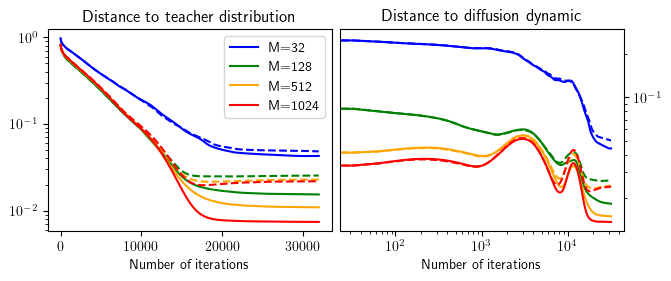

In [41]:
p=0.3
fig, ax = plt.subplots(1, 2, figsize=(22 * p, 9 * p), constrained_layout=True)

for width in width_list:
    idx = dict[(0,width)]['distance_teacher_idx']
    res = np.zeros(len(idx))
    res_unbiased = np.zeros(len(idx))
    for seed in seed_list:
        res += np.array(dict[(seed, width)]['distance_teacher_list'])
        res_unbiased += np.array(dict_unbiased[(seed, width)]['distance_teacher_list'])
    res /= len(seed_list)
    res_unbiased /= len(seed_list)
    ax[0].plot(idx, res_unbiased, color=color_dict[width], label=f'M={width}')
    ax[0].plot(idx, res, '--', color=color_dict[width])
    
    idx = dict[(0,width)]['distance_diffusion_idx']
    res = np.zeros(len(idx))
    res_unbiased = np.zeros(len(idx))
    for seed in seed_list:
        res += np.array(dict[(seed, width)]['distance_diffusion_list'])
        res_unbiased += np.array(dict_unbiased[(seed, width)]['distance_diffusion_list'])
    res /= len(seed_list)
    res_unbiased /= len(seed_list)
    ax[1].plot(idx, res_unbiased, color=color_dict[width])
    ax[1].plot(idx, res, '--', color=color_dict[width])

ax[0].legend()
ax[0].set_yscale('log')
#ax[0].set_xscale('log')
ax[0].set_xlabel('Number of iterations')
ax[0].set_title('Distance to teacher distribution')


#ax[1].legend()
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_xlabel('Number of iterations')
ax[1].set_title('Distance to diffusion dynamic')
ax[1].yaxis.tick_right()
#ax[1].yaxis.set_label_position("right")

#fig.savefig('relu1d_width_distance_evolution.pdf', format='pdf', bbox_inches='tight')

#plt.title('Evolution of the reduced risk during training')

### Varying regularization strength

In [42]:
lmbda_list = [-1, -2, -3, -4, -5]
color_dict = {-1: 'blue', -2: 'green', -3: 'orange', -4: 'red', -5: 'black'}

In [43]:
dict = {}
dict_unbiased = {}

for seed in tqdm(seed_list):
    for lmbda in lmbda_list:
        path = f'VarPro_ReLU_1d/results/width1024_lmbda{lmbda:.1f}_gamma100.0_N4096_ts-10.0_seed{seed}.pkl.gz'
        with gzip.open(path, 'rb') as f:
            dict[(seed, lmbda)] = pickle.load(f)
        path_unbiased = f'VarPro_ReLU_1d_unbiased/results/width1024_lmbda{lmbda:.1f}_gamma100.0_N4096_ts-10.0_seed{seed}.pkl.gz'
        with gzip.open(path_unbiased, 'rb') as f:
            dict_unbiased[(seed, lmbda)] = pickle.load(f)

100%|██████████| 6/6 [06:18<00:00, 63.08s/it]


<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_51127/2620950314.py:13: SyntaxWarning: invalid escape sequence '\l'
  ax[0].plot(idx, res_unbiased, color=color_dict[lmbda], label=f'$\lambda=10^{{{lmbda}}}$')


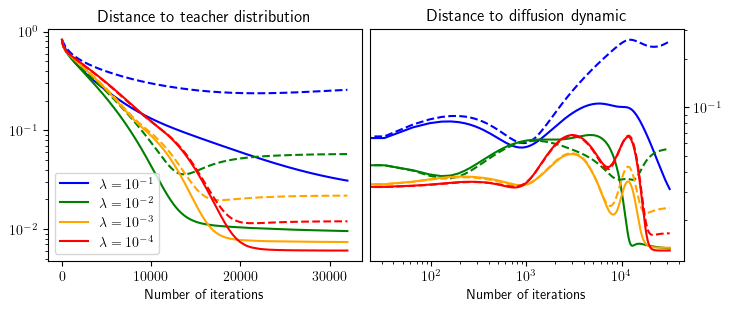

In [55]:
p=0.3
fig, ax = plt.subplots(1, 2, figsize=(24 * p, 10 * p), constrained_layout=True)

for lmbda in lmbda_list[:-1]:
    idx = dict[(0,lmbda)]['distance_teacher_idx']
    res = np.zeros(len(idx))
    res_unbiased = np.zeros(len(idx))
    for seed in seed_list:
        res += np.array(dict[(seed, lmbda)]['distance_teacher_list'])
        res_unbiased += np.array(dict_unbiased[(seed, lmbda)]['distance_teacher_list'])
    res /= len(seed_list)
    res_unbiased /= len(seed_list)
    ax[0].plot(idx, res_unbiased, color=color_dict[lmbda], label=f'$\lambda=10^{{{lmbda}}}$')
    ax[0].plot(idx, res, '--', color=color_dict[lmbda])
    
    idx = dict[(0,lmbda)]['distance_diffusion_idx']
    res = np.zeros(len(idx))
    res_unbiased = np.zeros(len(idx))
    for seed in seed_list:
        res += np.array(dict[(seed, lmbda)]['distance_diffusion_list'])
        res_unbiased += np.array(dict_unbiased[(seed, lmbda)]['distance_diffusion_list'])
    res /= len(seed_list)
    res_unbiased /= len(seed_list)
    ax[1].plot(idx, res_unbiased, color=color_dict[lmbda])
    ax[1].plot(idx, res, '--', color=color_dict[lmbda])

ax[0].legend()
ax[0].set_yscale('log')
#ax[0].set_xscale('log')
ax[0].set_xlabel('Number of iterations')
ax[0].set_title('Distance to teacher distribution')


#ax[1].legend()
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_xlabel('Number of iterations')
ax[1].set_title('Distance to diffusion dynamic')
ax[1].yaxis.tick_right()
#ax[1].yaxis.set_label_position("right")

#fig.savefig('relu1d_lmbda_distance_evolution.pdf', format='pdf', bbox_inches='tight')

#plt.title('Evolution of the reduced risk during training')

# Qualitative density evolution

In [12]:
from Utilities import *

In [57]:
path = 'diffusion_relu1d_gamma100_ts-10.pkl.gz'
with gzip.open(path, 'rb') as f:
    diffusion = pickle.load(f)

In [60]:
M = diffusion.shape[1]
X = np.linspace(-np.pi, np.pi, M+1)
X = 0.5 * (X[1:]+X[:-1])

<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_35739/4210567161.py:22: SyntaxWarning: invalid escape sequence '\m'
  ax[0].plot(idx, f_star, label='$\mu_\gamma$', color='black', linestyle='--', linewidth=1)


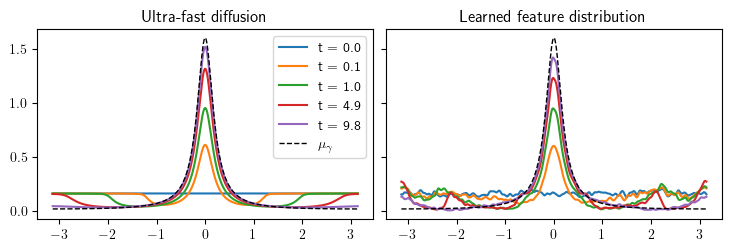

In [85]:
p=0.3
fig, ax = plt.subplots(1, 2, figsize=(24 * p, 8 * p), constrained_layout=True, sharey=True)

i_list = [0, 100, 1000, 5000, 10000]

N_points = 2000
# plot of the learned feature distribution (diracs smoothed with a gaussian)
for i in i_list:
    res = np.zeros(N_points)
    for seed in seed_list:
        w = dict_unbiased[(seed, -4)]['student_state_list'][i]['feature_model.weight'].numpy()
        f = circle_to_line(w)
        idx, density = gaussian_conv(f, scale=0.03, N_points=N_points)
        res += density
    res /= len(seed_list)
    ax[1].plot(idx, res)

    ax[0].plot(X, diffusion[i], label=f't = {i * 2**(-10):.1f}')

f_star = normalize(1 / (1 + 100 * np.sin(idx/2)**2))
ax[1].plot(idx, f_star, color='black', linestyle='--', linewidth=1)
ax[0].plot(idx, f_star, label='$\mu_\gamma$', color='black', linestyle='--', linewidth=1)
ax[0].legend()
#ax[1].yaxis.tick_right()
ax[0].title.set_text('Ultra-fast diffusion')
ax[1].title.set_text('Learned feature distribution')
#plt.savefig('density_evolution.pdf', format='pdf', bbox_inches='tight')
#plt.yscale('log')

# Comparison with two-timescale learning

## with varying width

In [10]:
seed_list = [1, 2, 3, 4, 5]

In [5]:
width_list = [32, 128, 512, 1024]
lmbda_list = [-1, -2, -3]
color_dict = {32: 'blue', 128: 'green', 512: 'orange', 1024: 'red'}

In [6]:
dict_varpro = {}
dict_2ts = {}

for seed in tqdm(seed_list):
    for width in width_list:
        for lmbda in lmbda_list:
            path = f'VarPro_ReLU_1d_unbiased/results/width{width:.0f}_lmbda{lmbda:.1f}_gamma100.0_N4096_ts-10.0_seed{seed}.pkl.gz'
            with gzip.open(path, 'rb') as f:
                dict_varpro[(seed, width, lmbda)] = pickle.load(f)
            path = f'2TS_ReLU_1d_unbiased/results/width{width:.0f}_lmbda{lmbda:.1f}_gamma100.0_N4096_ts-10.0_seed{seed}.pkl.gz'
            with gzip.open(path, 'rb') as f:
                dict_2ts[(seed, width, lmbda)] = pickle.load(f)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [09:11<00:00, 110.30s/it]


<>:38: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:40: SyntaxWarning: invalid escape sequence '\l'
<>:38: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:40: SyntaxWarning: invalid escape sequence '\l'
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_25168/911428589.py:38: SyntaxWarning: invalid escape sequence '\l'
  ax[0, 0].set_ylabel('$\lambda=10^{-1}$')
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_25168/911428589.py:39: SyntaxWarning: invalid escape sequence '\l'
  ax[1, 0].set_ylabel('$\lambda=10^{-2}$')
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_25168/911428589.py:40: SyntaxWarning: invalid escape sequence '\l'
  ax[2, 0].set_ylabel('$\lambda=10^{-3}$')


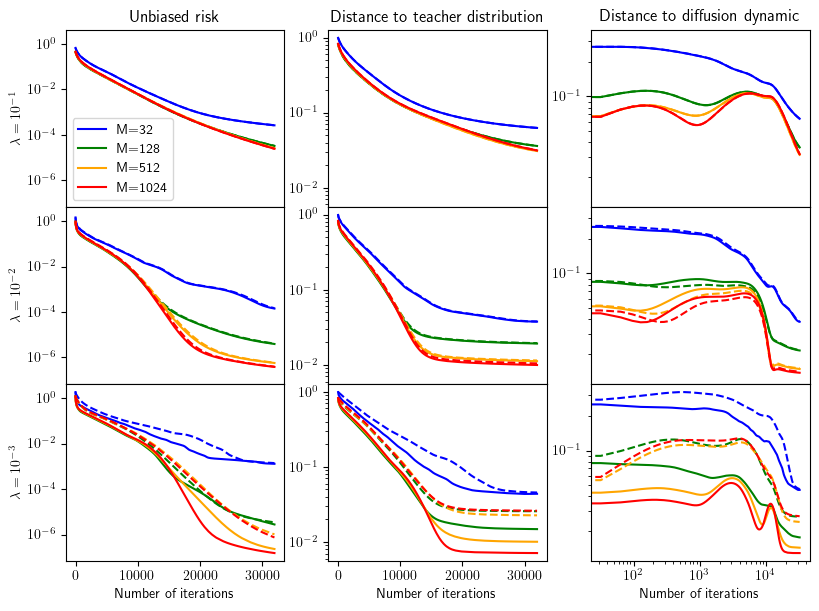

In [14]:
p=0.3
fig, ax = plt.subplots(3, 3, figsize=(32 * p, 23 * p), constrained_layout=False, sharex='col', sharey='col')

for width in width_list:
    for i, lmbda in enumerate([-1, -2, -3]):
        res = np.zeros(32000)
        res_2ts = np.zeros(32000)
        for seed in seed_list:
            res += np.array(dict_varpro[(seed, width, lmbda)]['loss_list'])
            res_2ts += np.array(dict_2ts[(seed, width, lmbda)]['loss_list'])
        res /= len(seed_list)
        res_2ts /= len(seed_list)
        ax[i,0].plot(res, color=color_dict[width], label=f'M={width}')
        ax[i,0].plot(res_2ts, '--', color=color_dict[width])

        idx = dict_varpro[(1,width,lmbda)]['distance_teacher_idx']
        res = np.zeros(len(idx))
        res_2ts = np.zeros(len(idx))
        for seed in seed_list:
            res += np.array(dict_varpro[(seed, width, lmbda)]['distance_teacher_list'])
            res_2ts += np.array(dict_2ts[(seed, width, lmbda)]['distance_teacher_list'])
        res /= len(seed_list)
        res_2ts /= len(seed_list)
        ax[i, 1].plot(idx, res, color=color_dict[width])
        ax[i, 1].plot(idx, res_2ts, '--', color=color_dict[width])

        idx = dict_varpro[(1,width,lmbda)]['distance_diffusion_idx']
        res = np.zeros(len(idx))
        res_2ts = np.zeros(len(idx))
        for seed in seed_list:
            res += np.array(dict_varpro[(seed, width, lmbda)]['distance_diffusion_list'])
            res_2ts += np.array(dict_2ts[(seed, width, lmbda)]['distance_diffusion_list'])
        res /= len(seed_list)
        res_2ts /= len(seed_list)
        ax[i, 2].plot(idx, res, color=color_dict[width])
        ax[i, 2].plot(idx, res_2ts, '--', color=color_dict[width])

ax[0, 0].set_ylabel('$\lambda=10^{-1}$')
ax[1, 0].set_ylabel('$\lambda=10^{-2}$')
ax[2, 0].set_ylabel('$\lambda=10^{-3}$')

ax[0, 0].legend()
ax[0, 0].set_yscale('log')
#ax[1, 0].set_yscale('log')
ax[2, 0].set_xlabel('Number of iterations')
ax[0, 0].set_title('Unbiased risk')

ax[0, 1].set_yscale('log')
#ax[1, 1].set_yscale('log')
ax[2, 1].set_xlabel('Number of iterations')
ax[0, 1].set_title('Distance to teacher distribution')

ax[0, 2].set_yscale('log')
#ax[1, 2].set_yscale('log')
ax[0, 2].set_xscale('log')
#ax[1, 1].set_xscale('log')
ax[2, 2].set_xlabel('Number of iterations')
ax[0, 2].set_title('Distance to diffusion dynamic')


fig.subplots_adjust(hspace=0)

fig.savefig('relu1d_2ts.pdf', format='pdf', bbox_inches='tight')

#plt.title('Evolution of the reduced risk during training')

Text(0.5, 1.0, 'Evolution of the (unbiased) reduced risk during training')

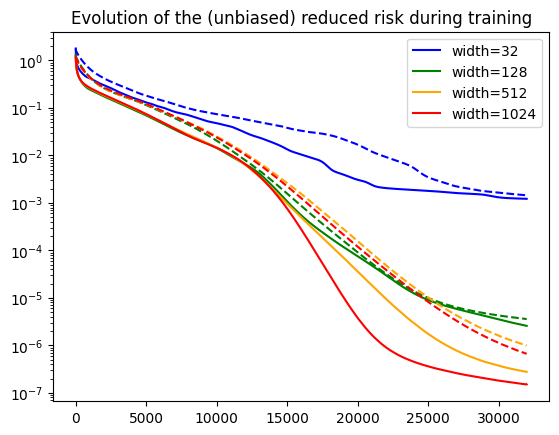

In [27]:
for width in width_list:
    res_varpro = np.zeros(32000)
    res_2ts = np.zeros(32000)
    for seed in seed_list:
        res_varpro += np.array(dict_varpro[(seed, width)]['loss_list'])
        res_2ts += np.array(dict_2ts[(seed, width)]['loss_list'])
    res_varpro /= len(seed_list)
    res_2ts /= len(seed_list)
    plt.plot(res_varpro, color=color_dict[width], label=f'width={width}')
    plt.plot(res_2ts, '--', color=color_dict[width])
    #plt.plot(dict_varpro[width]['loss_list'], color=color_dict[width], label=f'width={width}')
    #plt.plot(dict_2ts[width]['loss_list'], '--', color=color_dict[width])
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.title('Evolution of the (unbiased) reduced risk during training')

Text(0.5, 1.0, 'Distance to the teacher distribution')

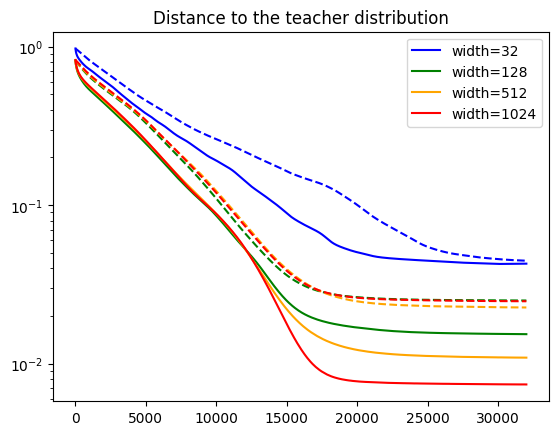

In [28]:
for width in width_list:
    idx = dict_varpro[(0,width)]['distance_teacher_idx']
    #idx_2ts = dict_2ts[(0,width)]['distance_teacher_idx']
    res_varpro = np.zeros(len(idx))
    res_2ts = np.zeros(len(idx))
    for seed in seed_list:
        res_varpro += np.array(dict_varpro[(seed, width)]['distance_teacher_list'])
        res_2ts += np.array(dict_2ts[(seed, width)]['distance_teacher_list'])
    res_varpro /= len(seed_list)
    res_2ts /= len(seed_list)
    plt.plot(idx, res_varpro, color=color_dict[width], label=f'width={width}')
    plt.plot(idx, res_2ts, '--', color=color_dict[width])
    #plt.plot(dict_varpro[width]['distance_teacher_idx'], dict_varpro[width]['distance_teacher_list'], color=color_dict[width], label=f'width={width}')
    #plt.plot(dict_2ts[width]['distance_teacher_idx'], dict_2ts[width]['distance_teacher_list'], '--', color=color_dict[width])
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.title('Distance to the teacher distribution')

Text(0.5, 1.0, 'Distance to ultra-fast diffusion')

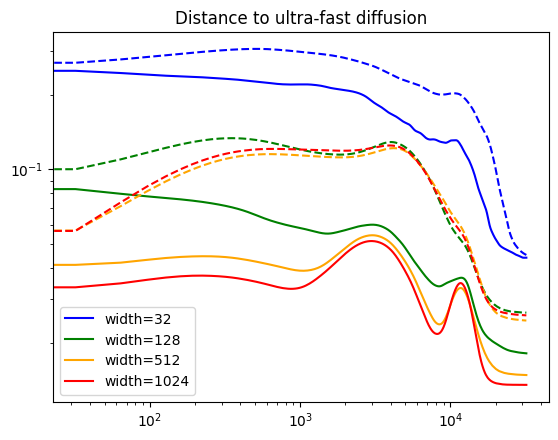

In [29]:
for width in width_list:
    idx = dict_varpro[(0,width)]['distance_diffusion_idx']
    #idx_2ts = dict_2ts[(0,width)]['distance_diffusion_idx']
    res_varpro = np.zeros(len(idx))
    res_2ts = np.zeros(len(idx))
    for seed in seed_list:
        res_varpro += np.array(dict_varpro[(seed, width)]['distance_diffusion_list'])
        res_2ts += np.array(dict_2ts[(seed, width)]['distance_diffusion_list'])
    res_varpro /= len(seed_list)
    res_2ts /= len(seed_list)
    plt.plot(idx, res_varpro, color=color_dict[width], label=f'width={width}')
    plt.plot(idx, res_2ts, '--', color=color_dict[width])
    #plt.plot(dict_varpro[width]['distance_diffusion_idx'], dict_varpro[width]['distance_diffusion_list'], color=color_dict[width], label=f'width={width}')
    #plt.plot(dict_2ts[width]['distance_diffusion_idx'], dict_2ts[width]['distance_diffusion_list'], '--', color=color_dict[width])
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title('Distance to ultra-fast diffusion')

## with varying regularization

In [4]:
lmbda_list = [-1, -2, -3]
color_dict = {-1: 'blue', -2: 'green', -3: 'orange', -4: 'red', -5: 'black'}

In [5]:
dict_varpro = {}
dict_2ts = {}

for seed in tqdm(seed_list):
    for lmbda in lmbda_list:
        path = f'VarPro_ReLU_1d_unbiased/results/width1024_lmbda{lmbda:.1f}_gamma100.0_N4096_ts-10.0_seed{seed}.pkl.gz'
        with gzip.open(path, 'rb') as f:
            dict_varpro[(seed, lmbda)] = pickle.load(f)
        path = f'2TS_ReLU_1d_unbiased/results/width1024_lmbda{lmbda:.1f}_gamma100.0_N4096_ts-10.0_seed{seed}.pkl.gz'
        with gzip.open(path, 'rb') as f:
            dict_2ts[(seed, lmbda)] = pickle.load(f)

100%|██████████| 6/6 [1:33:38<00:00, 936.38s/it] 


Text(0.5, 1.0, 'Evolution of the (unbiased) reduced risk during training')

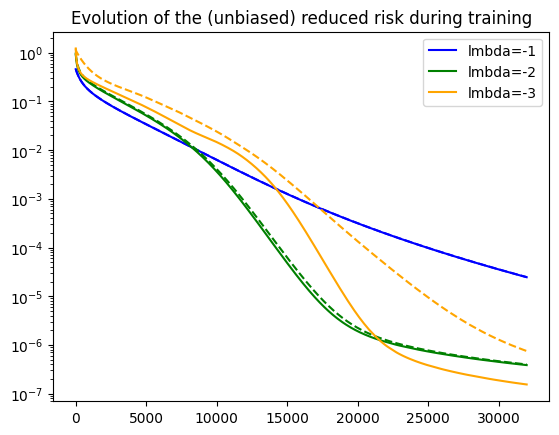

In [20]:
for lmbda in lmbda_list:
    res_varpro = np.zeros(32000)
    res_2ts = np.zeros(32000)
    for seed in seed_list:
        res_varpro += np.array(dict_varpro[(seed, lmbda)]['loss_list'])
        res_2ts += np.array(dict_2ts[(seed, lmbda)]['loss_list'])
    res_varpro /= len(seed_list)
    res_2ts /= len(seed_list)
    plt.plot(res_varpro, color=color_dict[lmbda], label=f'lmbda={lmbda}')
    plt.plot(res_2ts, '--', color=color_dict[lmbda])
    #plt.plot(dict_varpro[width]['loss_list'], color=color_dict[width], label=f'width={width}')
    #plt.plot(dict_2ts[width]['loss_list'], '--', color=color_dict[width])
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.title('Evolution of the (unbiased) reduced risk during training')

Text(0.5, 1.0, 'Distance to the teacher distribution')

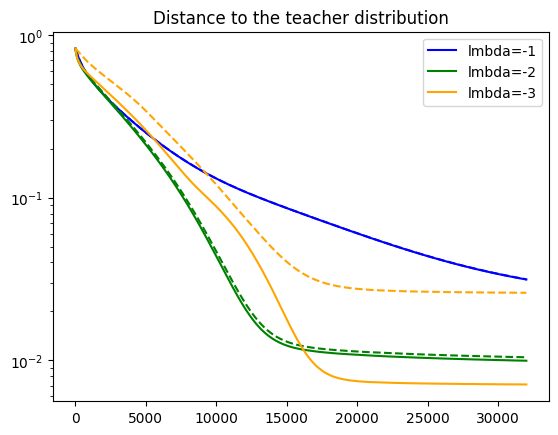

In [23]:
for lmbda in lmbda_list:
    idx = dict_varpro[(1,lmbda)]['distance_teacher_idx']
    res_varpro = np.zeros(len(idx))
    res_2ts = np.zeros(len(idx))
    for seed in seed_list:
        res_varpro += np.array(dict_varpro[(seed, lmbda)]['distance_teacher_list'])
        res_2ts += np.array(dict_2ts[(seed, lmbda)]['distance_teacher_list'])
    res_varpro /= len(seed_list)
    res_2ts /= len(seed_list)
    plt.plot(idx, res_varpro, color=color_dict[lmbda], label=f'lmbda={lmbda}')
    plt.plot(idx, res_2ts, '--', color=color_dict[lmbda])
    #plt.plot(dict_varpro[width]['loss_list'], color=color_dict[width], label=f'width={width}')
    #plt.plot(dict_2ts[width]['loss_list'], '--', color=color_dict[width])
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.title('Distance to the teacher distribution')

Text(0.5, 1.0, 'Distance to ultra-fast diffusion')

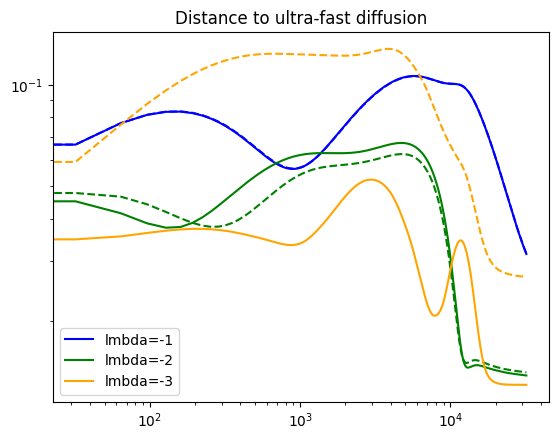

In [26]:
for lmbda in lmbda_list:
    idx = dict_varpro[(1,lmbda)]['distance_diffusion_idx']
    res_varpro = np.zeros(len(idx))
    res_2ts = np.zeros(len(idx))
    for seed in seed_list:
        res_varpro += np.array(dict_varpro[(seed, lmbda)]['distance_diffusion_list'])
        res_2ts += np.array(dict_2ts[(seed, lmbda)]['distance_diffusion_list'])
    res_varpro /= len(seed_list)
    res_2ts /= len(seed_list)
    plt.plot(idx, res_varpro, color=color_dict[lmbda], label=f'lmbda={lmbda}')
    plt.plot(idx, res_2ts, '--', color=color_dict[lmbda])
    #plt.plot(dict_varpro[width]['loss_list'], color=color_dict[width], label=f'width={width}')
    #plt.plot(dict_2ts[width]['loss_list'], '--', color=color_dict[width])
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title('Distance to ultra-fast diffusion')

# Changing the shape of the target distribution

In [4]:
gamma_list = [10, 100, 1000]
color_dict = {10: 'blue', 100: 'green', 1000: 'orange'}

<>:12: SyntaxWarning: invalid escape sequence '\g'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\g'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\l'
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_51127/1431036345.py:12: SyntaxWarning: invalid escape sequence '\g'
  ax.plot(X, f_star, label=f'$\gamma$ = {gamma}', color=color_dict[gamma])
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_51127/1431036345.py:16: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('$\omega$')
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_51127/1431036345.py:17: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title('log-density $\log(\mu_\gamma(\omega))$')


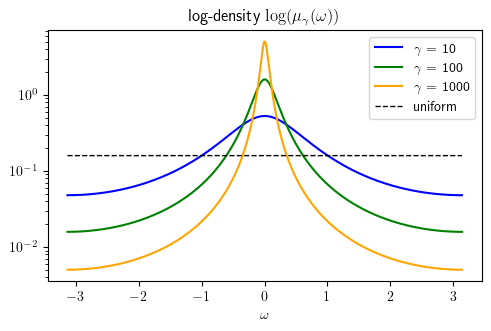

In [77]:
M = 4096

X = np.linspace(-np.pi, np.pi, M+1)
X = 0.5 * (X[1:]+X[:-1])

f0 = normalize(np.ones(M)) ## initialization
p=0.4
fig, ax = plt.subplots(figsize=(12 * p, 8 * p), constrained_layout=True)

for gamma in gamma_list:
    f_star = normalize(1 / (1 + gamma * np.sin(X/2)**2)) ## target
    ax.plot(X, f_star, label=f'$\gamma$ = {gamma}', color=color_dict[gamma])

ax.plot(X, f0, label='uniform', color='black', linestyle='--', linewidth=1)

ax.set_xlabel('$\omega$')
ax.set_title('log-density $\log(\mu_\gamma(\omega))$')
ax.set_yscale('log')
ax.legend()
#fig.savefig("gamma_densities.pdf", format="pdf", bbox_inches="tight")
#ax.axis('equal')

In [5]:
dict = {}

for seed in tqdm(seed_list):
    for gamma in gamma_list:
        path = f'VarPro_ReLU_1d_unbiased/results/width1024_lmbda-4.0_gamma{gamma:.1f}_N4096_ts-10.0_seed{seed}.pkl.gz'
        with gzip.open(path, 'rb') as f:
            dict[(seed, gamma)] = pickle.load(f)

100%|██████████| 6/6 [01:12<00:00, 12.04s/it]


<>:9: SyntaxWarning: invalid escape sequence '\g'
<>:9: SyntaxWarning: invalid escape sequence '\g'
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_65367/145378772.py:9: SyntaxWarning: invalid escape sequence '\g'
  ax[0].plot(res, color=color_dict[gamma], label=f'$\gamma={gamma}$')


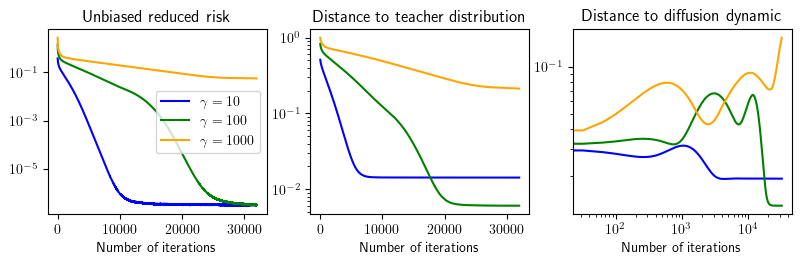

In [22]:
p=0.3
fig, ax = plt.subplots(1, 3, figsize=(32 * p, 8 * p), constrained_layout=False)

for gamma in gamma_list:
    res = np.zeros(32000)
    for seed in seed_list:
        res += np.array(dict[(seed, gamma)]['loss_list'])
    res /= len(seed_list)
    ax[0].plot(res, color=color_dict[gamma], label=f'$\gamma={gamma}$')
    
    idx = dict[(0,gamma)]['distance_teacher_idx']
    res = np.zeros(len(idx))
    for seed in seed_list:
        res += np.array(dict[(seed, gamma)]['distance_teacher_list'])
    res /= len(seed_list)
    ax[1].plot(idx, res, color=color_dict[gamma])

    idx = dict[(0,gamma)]['distance_diffusion_idx']
    res = np.zeros(len(idx))
    for seed in seed_list:
        res += np.array(dict[(seed, gamma)]['distance_diffusion_list'])
    res /= len(seed_list)
    ax[2].plot(idx, res, color=color_dict[gamma])

ax[0].legend()
ax[0].set_yscale('log')
#ax[0].set_xscale('log')
ax[0].set_xlabel('Number of iterations')
ax[0].set_title('Unbiased reduced risk')


#ax[1].legend()
ax[1].set_yscale('log')
#ax[1].set_xscale('log')
ax[1].set_xlabel('Number of iterations')
ax[1].set_title('Distance to teacher distribution')
#ax[1].yaxis.tick_right()
#ax[1].yaxis.set_label_position("right")

#ax[1].legend()
ax[2].set_yscale('log')
ax[2].set_xscale('log')
ax[2].set_xlabel('Number of iterations')
ax[2].set_title('Distance to diffusion dynamic')
#ax[1].yaxis.tick_right()
#ax[1].yaxis.set_label_position("right")

fig.subplots_adjust(hspace=0)

fig.savefig('relu1d_gamma_diffusion.pdf', format='pdf', bbox_inches='tight')

#plt.title('Evolution of the reduced risk during training')

### Changing the regularization function (entropy regularization)

In [30]:
width_list = [32, 128, 512, 1024]
color_dict = {32: 'blue', 128: 'green', 512: 'orange', 1024: 'red'}

In [31]:
dict1 = {}
dict2 = {}

for seed in seed_list:
    for width in width_list:
        path = f'2TS_ReLU_1d_entropy/results/width{width:.0f}_lmbda-1.0_gamma100.0_N4096_ts-10.0_seed{seed}.pkl.gz'
        with gzip.open(path, 'rb') as f:
            dict1[(seed, width)] = pickle.load(f)
        path = f'2TS_ReLU_1d_entropy/results/width{width:.0f}_lmbda-2.0_gamma100.0_N4096_ts-10.0_seed{seed}.pkl.gz'
        with gzip.open(path, 'rb') as f:
            dict2[(seed, width)] = pickle.load(f)
    print(f'Loaded seed {seed}.')

Loaded seed 0.
Loaded seed 1.
Loaded seed 2.
Loaded seed 3.
Loaded seed 4.
Loaded seed 5.


Text(0.5, 1.0, 'Evolution of the reduced risk (entropy regularization)')

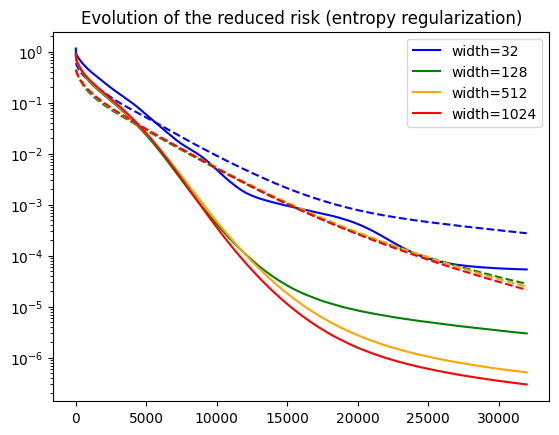

In [33]:
for width in width_list:
    res1 = np.zeros(32000)
    res2 = np.zeros(32000)
    for seed in seed_list:
        res1 += np.array(dict1[(seed, width)]['loss_list'])
        res2 += np.array(dict2[(seed, width)]['loss_list'])
    res1 /= len(seed_list)
    res2 /= len(seed_list)
    plt.plot(res2, color=color_dict[width], label=f'width={width}')
    plt.plot(res1, '--', color=color_dict[width])
    #plt.plot(dict1[width]['loss_list'], color=color_dict[width], label=f'width={width}')
    #plt.plot(dict2[width]['loss_list'], '--', color=color_dict[width])
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.title('Evolution of the reduced risk (entropy regularization)')

Text(0.5, 1.0, 'Distance to the teacher distribution')

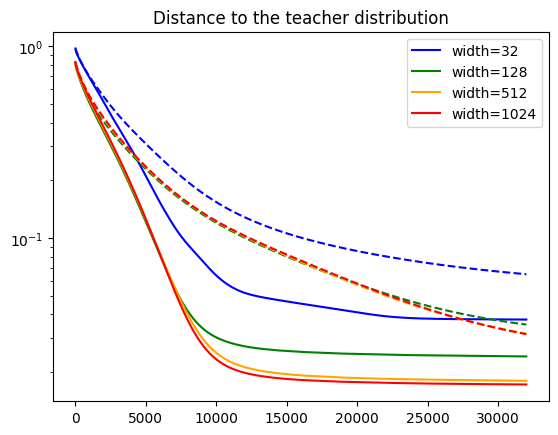

In [34]:
for width in width_list:
    idx = dict1[(0,width)]['distance_teacher_idx']
    res1 = np.zeros(len(idx))
    res2 = np.zeros(len(idx))
    for seed in seed_list:
        res1 += np.array(dict1[(seed, width)]['distance_teacher_list'])
        res2 += np.array(dict2[(seed, width)]['distance_teacher_list'])
    res1 /= len(seed_list)
    res2 /= len(seed_list)
    plt.plot(idx, res2, color=color_dict[width], label=f'width={width}')
    plt.plot(idx, res1, '--', color=color_dict[width])
    #plt.plot(dict1[width]['distance_teacher_idx'], dict1[width]['distance_teacher_list'], color=color_dict[width], label=f'width={width}')
    #plt.plot(dict2[width]['distance_teacher_idx'], dict2[width]['distance_teacher_list'], '--', color=color_dict[width])
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.title('Distance to the teacher distribution')

Text(0.5, 1.0, 'Distance to diffusion limit')

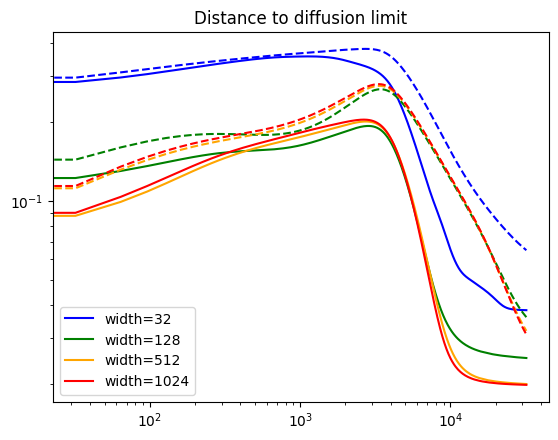

In [35]:
for width in width_list:
    idx = dict1[(0,width)]['distance_diffusion_idx']
    res1 = np.zeros(len(idx))
    res2 = np.zeros(len(idx))
    for seed in seed_list:
        res1 += np.array(dict1[(seed, width)]['distance_diffusion_list'])
        res2 += np.array(dict2[(seed, width)]['distance_diffusion_list'])
    res1 /= len(seed_list)
    res2 /= len(seed_list)
    plt.plot(idx, res2, color=color_dict[width], label=f'width={width}')
    plt.plot(idx, res1, '--', color=color_dict[width])
    #plt.plot(dict1[width]['distance_diffusion_idx'], dict1[width]['distance_diffusion_list'], color=color_dict[width], label=f'width={width}')
    #plt.plot(dict2[width]['distance_diffusion_idx'], dict2[width]['distance_diffusion_list'], '--', color=color_dict[width])
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title('Distance to diffusion limit')